In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
!wget https://github.com/ardallie/age-gender-convnet-utkface/raw/main/convnet/output/models/age_gender_model.h5 age_gender_model.h5

--2022-02-16 17:35:00--  https://github.com/ardallie/age-gender-convnet-utkface/raw/main/convnet/output/models/age_gender_model.h5
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ardallie/age-gender-convnet-utkface/main/convnet/output/models/age_gender_model.h5 [following]
--2022-02-16 17:35:00--  https://raw.githubusercontent.com/ardallie/age-gender-convnet-utkface/main/convnet/output/models/age_gender_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31418488 (30M) [application/octet-stream]
Saving to: ‘age_gender_model.h5’

age_gender_model.h5 100%[===================>]  29.96M  --.-KB

In [ ]:
!wget https://github.com/Sobika2531/Age-Gender-And-Race-Detection-Using-CNN/raw/main/Sample%20input%20images/26_0_3_20170119191924624.jpg

--2022-02-16 17:42:08--  https://github.com/Sobika2531/Age-Gender-And-Race-Detection-Using-CNN/raw/main/Sample%20input%20images/26_0_3_20170119191924624.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sobika2531/Age-Gender-And-Race-Detection-Using-CNN/main/Sample%20input%20images/26_0_3_20170119191924624.jpg [following]
--2022-02-16 17:42:08--  https://raw.githubusercontent.com/Sobika2531/Age-Gender-And-Race-Detection-Using-CNN/main/Sample%20input%20images/26_0_3_20170119191924624.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4706 (4.6K) [image/jpeg]
Saving to: ‘26_0_3_2017011919192462

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("age_gender_model.h5")

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
import cv2
import matplotlib.pyplot as plt

def process_image(image_path):
    image_size = [200, 200]

    image = cv2.imread(image_path)
    img = cv2.resize(image, (image_size[1], image_size[0]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    img = img / 255.
    img = np.expand_dims(img, axis=0)

    print(img.shape)
    pred_gender, pred_age = model.predict(img)


    pred_gender = round(pred_gender[0][0])
    pred_age = round(pred_age[0][0])
    pred_gender_label = "Man" if pred_gender == 0 else "Woman" if x == 1 else "unknown"

    plt.imshow(img[0])
    plt.title(f"Gender {pred_gender_label} Age {pred_age}")

(1, 200, 200, 3)


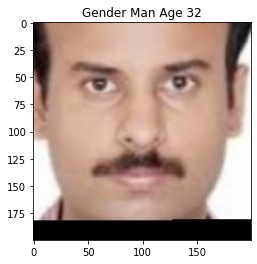

In [ ]:
image_path = "26_0_3_20170119191924624.jpg"
process_image(image_path)

# Permute color channel order

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(3, 200, 200))
# Permute
# send 1º channel takes the oriignal 2 second channel
# send 2º channel takes the oriignal 3 second channel
# send 3º channel takes the oriignal 1 second channel
x = layers.Permute((2, 3, 1))(inputs)
gender, age = model(x)
model_2 = tf.keras.Model(inputs, [gender, age])

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 200, 200)]     0         
                                                                 
 permute (Permute)           (None, 200, 200, 3)       0         
                                                                 
 model (Functional)          [(None, 1),               2607202   
                              (None, 1)]                         
                                                                 
Total params: 2,607,202
Trainable params: 2,606,434
Non-trainable params: 768
_________________________________________________________________


(1, 3, 200, 200)


Text(0.5, 1.0, 'Gender Man Age 32')

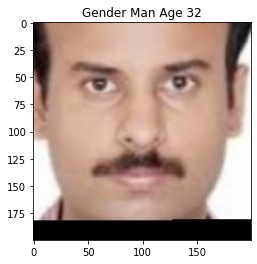

In [ ]:
import cv2
import matplotlib.pyplot as plt
image_size = [200, 200]

image = cv2.imread("26_0_3_20170119191924624.jpg")
img = cv2.resize(image, (image_size[1], image_size[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)
img = img / 255.
input_data = np.moveaxis(img, 2, 0)
input_data = np.expand_dims(input_data, axis=0)

print(input_data.shape)
pred_gender, pred_age = model_2.predict(input_data)

pred_gender = round(pred_gender[0][0])
pred_age = round(pred_age[0][0])
pred_gender_label = "Man" if pred_gender == 0 else "Woman" if x == 1 else "unknown"

plt.imshow(img)
plt.title(f"Gender {pred_gender_label} Age {pred_age}")

# Keras2ONNX

In [ ]:
# Install onnx and tf2onnx
!python3 -m pip install tf2onnx

     |████████████████████████████████| 435 kB 12.1 MB/s 
     |████████████████████████████████| 12.7 MB 36.7 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
import onnx
import tf2onnx
onnx_model, _ = tf2onnx.convert.from_keras(model_2, inputs_as_nchw="input_1:0", opset=12)
onnx.save(onnx_model, 'age_gender_model.onnx')

Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
